In [1]:
import sys
sys.path.append('../../development/')

from auxiliary import loadData_staticTargetAddrMatch, prepare_data_loaders
import numpy as np
import torch;
import torch.nn as nn
import torch.optim as optim

from matplotlib import pyplot as plt

In [2]:
target_adresses = ["d8:47:32:eb:6c:38",
                    "50:c7:bf:19:e6:4d",
                    "18:28:61:3d:94:7a"]

datajsonpath = "../../experiments/exp004_20241022_sna_kadirburakerdem/data-tshark/data.json"
inp_rss_vals, gt_locations = loadData_staticTargetAddrMatch(datajsonpath, second_hold = 5, shuffle=False, 
                                                            target_addresses= target_adresses, snap250ms=False)

In [3]:
gt_locations.shape, inp_rss_vals.shape

((2498, 2), (2498, 3))

In [4]:
N=100
filtered_rss = np.asarray([np.convolve(inp_rss_vals[:,0], np.ones(N)/N, mode='same'),
                           np.convolve(inp_rss_vals[:,1], np.ones(N)/N, mode='same'),
                           np.convolve(inp_rss_vals[:,2], np.ones(N)/N, mode='same')])
filtered_rss = np.swapaxes(filtered_rss,0,1)

In [5]:
def plotXY(gt_locations, gt_range):
    plt.ylim([-5, 0])
    plt.xlim([0,5])
    plt.grid()
    plt.plot(gt_locations[gt_range,0], -1*gt_locations[gt_range,1])

In [6]:
def plotRSS(target_adresses, inp_rss_vals, gt_range):
    fig, axs = plt.subplots(3, 1, figsize=(15, 10))
    
    # Titles for the subplots
    titles = target_adresses
    
    # Loop through the 3 columns (0, 1, 2) to create subplots
    for i in range(3):
        # Plot the RSS values for the given limit in each subplot
        axs[i].plot(gt_range, inp_rss_vals[gt_range, i], color="blue", label="RSS values")
        
        # Calculate the mean of the RSS values
        mean_value = np.mean(inp_rss_vals[gt_range, i])
        
        # Plot the mean as a horizontal line
        axs[i].axhline(y=mean_value, color="red", linestyle="--", label=f"Mean = {mean_value:.2f}")
        
        # Set title, labels, and legend for each subplot
        axs[i].set_title(titles[i])
        axs[i].set_xlabel("Sample Index")
        axs[i].set_ylabel("RSS Value")
        axs[i].legend()
    
    # Adjust layout for better spacing between plots
    plt.tight_layout()
    
    # Display the figure with all subplots
    plt.show()

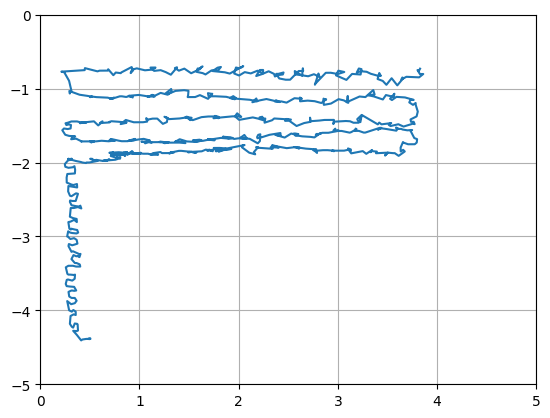

In [7]:
limits = range(820,1770)
plotXY(gt_locations, limits)

# Unfiltered

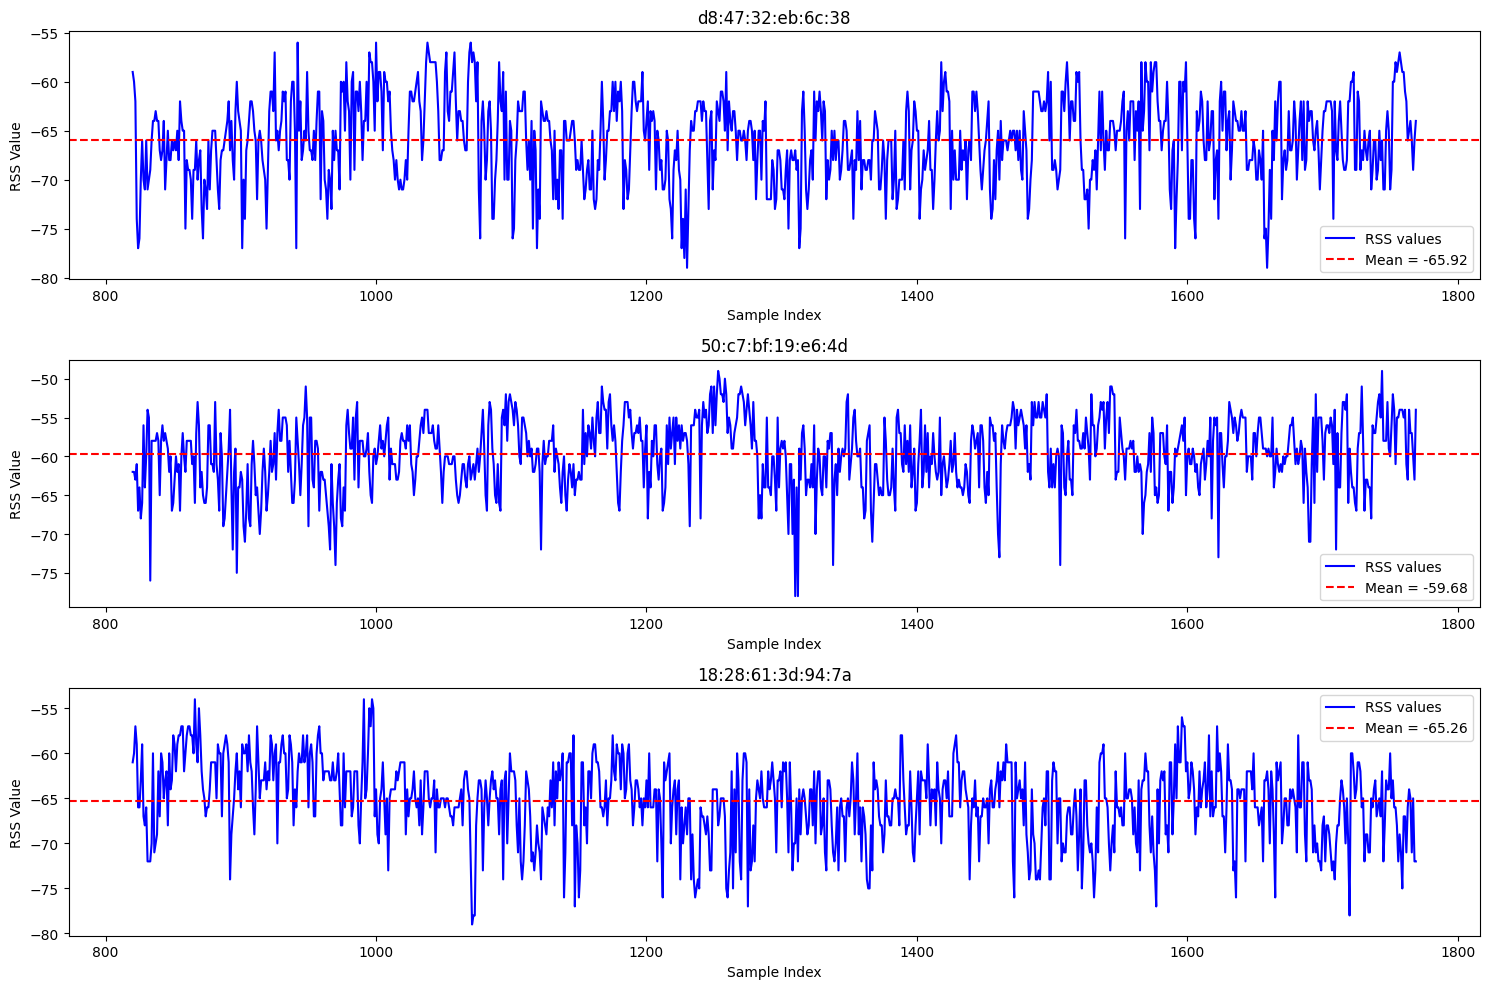

In [8]:
plotRSS(target_adresses, inp_rss_vals, limits)

# Filtered

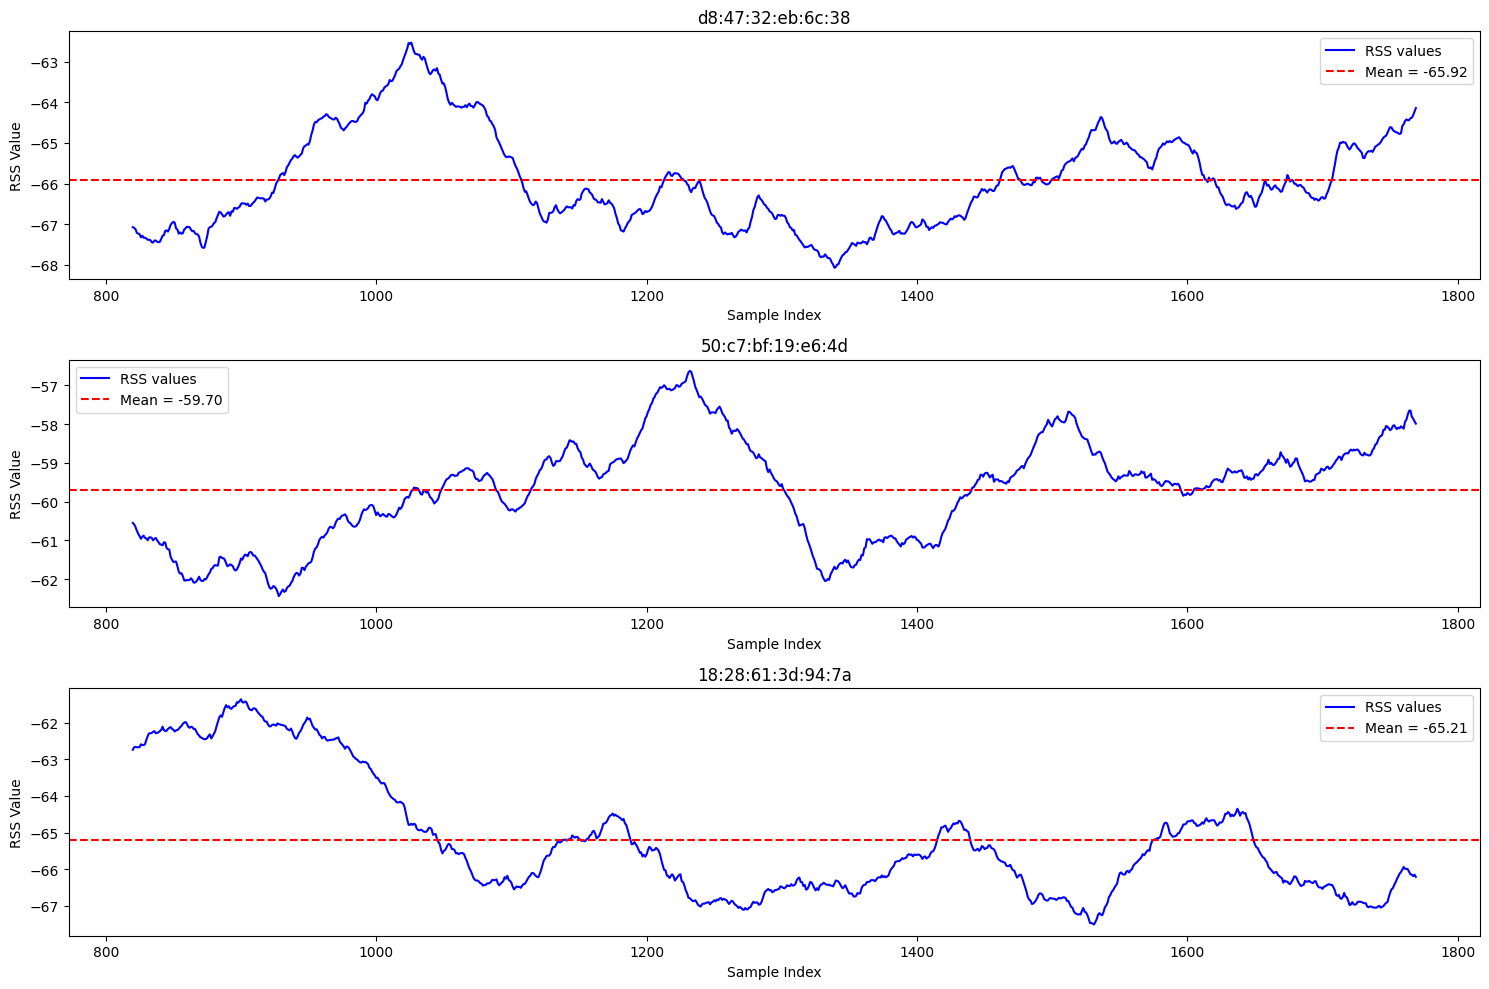

In [9]:
plotRSS(target_adresses, filtered_rss, limits)